In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

Using TensorFlow backend.


In [2]:
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/h_test.csv
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/h_train.csv

--2018-11-09 06:05:11--  https://s3.ap-northeast-2.amazonaws.com/mjgim/h_test.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.77
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11015975 (11M) [text/csv]
Saving to: ‘./h_test.csv’

h_test.csv          100%[===================>]  10.50M  --.-KB/s    in 0.1s    

2018-11-09 06:05:11 (102 MB/s) - ‘./h_test.csv’ saved [11015975/11015975]

--2018-11-09 06:05:11--  https://s3.ap-northeast-2.amazonaws.com/mjgim/h_train.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.77
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122518875 (117M) [text/csv]
Saving to: ‘./h_train.csv’

h_train.csv         100%[===================>] 116.8

In [3]:
training_data = np.loadtxt("h_train.csv", delimiter=",")
training_img = training_data[:,:-1]
training_lab = training_data[:,-1]

test_img = np.loadtxt("h_test.csv", delimiter=",")

In [4]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))

print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (6243, 784)
Training set (labels) shape: (6243,)
Test set (images) shape: (1561, 784)


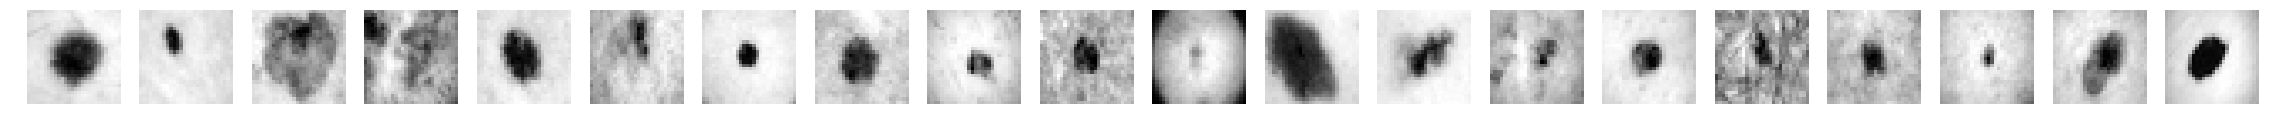

In [5]:
sample_size = 20

idx_s = np.random.randint(0,len(training_img), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size*2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(training_img[idx_s][i], [28,28]),cmap="gray")

In [6]:
# Set parameter
 
batch_size = 10
epochs = 5

In [7]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

train_model = model.fit(training_img, training_lab, epochs=epochs, verbose=2)

Epoch 1/5
 - 1s - loss: 16.1181 - acc: 0.0000e+00
Epoch 2/5
 - 0s - loss: 16.1181 - acc: 0.0000e+00
Epoch 3/5
 - 0s - loss: 16.1181 - acc: 0.0000e+00
Epoch 4/5
 - 0s - loss: 16.1181 - acc: 0.0000e+00
Epoch 5/5
 - 0s - loss: 16.1181 - acc: 0.0000e+00


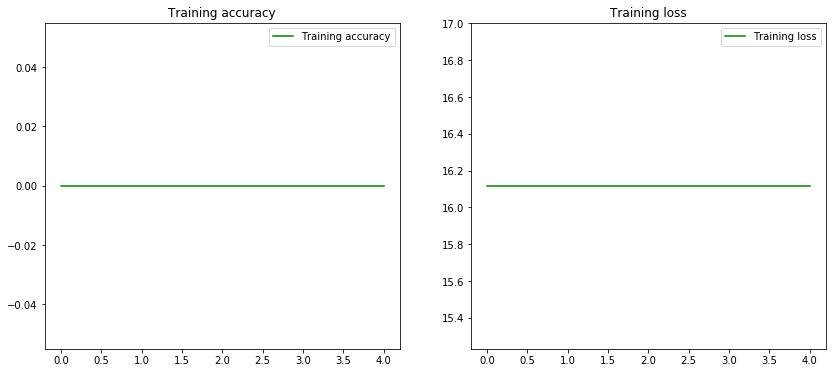

In [8]:
history = train_model.history
# plot results
hist = train_model.history
acc = hist['acc']
loss = hist['loss']
epochs = range(len(acc))
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].set_title('Training accuracy')
ax[0].legend(loc=1)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].set_title('Training loss')
ax[1].legend(loc=1)
plt.show()# Making fileque


In [ ]:
# result = model.predict_classes(test_img)
# np.savetxt("h_result.csv", result, delimiter=",")